## Data Preparation and preprocessing

In [1]:
import pandas as pd
import numpy as np
import nltk
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ["id","likesCount","ownerProfilePicUrl","ownerUsername","postUrl","text","timestamp","sentiment"]
df = pd.read_csv('test2.csv', names = col_names , delimiter=';')

In [3]:
df.head()

,id,likesCount,ownerProfilePicUrl,ownerUsername,postUrl,text,timestamp,sentiment
0,id,likesCount,ownerProfilePicUrl,ownerUsername,postUrl,text,timestamp,sentiment
1,"1,79813E+16",4,https://scontent-dub4-1.cdninstagram.com/v/t51...,__fairest__,https://www.instagram.com/p/C0kqXCRun23/,NaN,2023-12-09T03:40:22.000Z,NaN
2,"1,79894E+16",0,https://scontent-dub4-1.cdninstagram.com/v/t51...,youcankallmejojo,https://www.instagram.com/p/C0kqXCRun23/,Which app do you use?,2023-12-09T09:10:14.000Z,neutral
3,"1,79928E+16",1,https://scontent-dub4-1.cdninstagram.com/v/t51...,precious_lovi,https://www.instagram.com/p/C0kqXCRun23/,@101dill,2023-12-09T14:44:23.000Z,neutral
4,"1,84013E+16",1,https://scontent-dub4-1.cdninstagram.com/v/t51...,precious_lovi,https://www.instagram.com/p/C0kqXCRun23/,Does she really though?,2023-12-09T14:44:52.000Z,neutral\t


In [4]:
df.shape

(537, 8)

In [5]:
print('Total Null Values in Dataset :')
print(df.isnull().sum()) # showing null values of train data

Total Null Values in Dataset :
id                     0
likesCount             0
ownerProfilePicUrl     0
ownerUsername         34
postUrl                0
text                  40
timestamp              0
sentiment             61
dtype: int64


In [6]:
df= df.dropna()

In [7]:
print(df.isnull().sum())

id                    0
likesCount            0
ownerProfilePicUrl    0
ownerUsername         0
postUrl               0
text                  0
timestamp             0
sentiment             0
dtype: int64


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['id', 'likesCount', 'ownerProfilePicUrl', 'ownerUsername', 'postUrl',
       'text', 'timestamp', 'sentiment'],
      dtype='object')

In [10]:
df['sentiment'] = df['sentiment'].str.strip()

In [11]:
df = df[df['sentiment'] != 'sentiment']

Total number of sentiments of instagram comments : green
sentiment
positive    188
neutral     167
negative     86
Name: count, dtype: int64


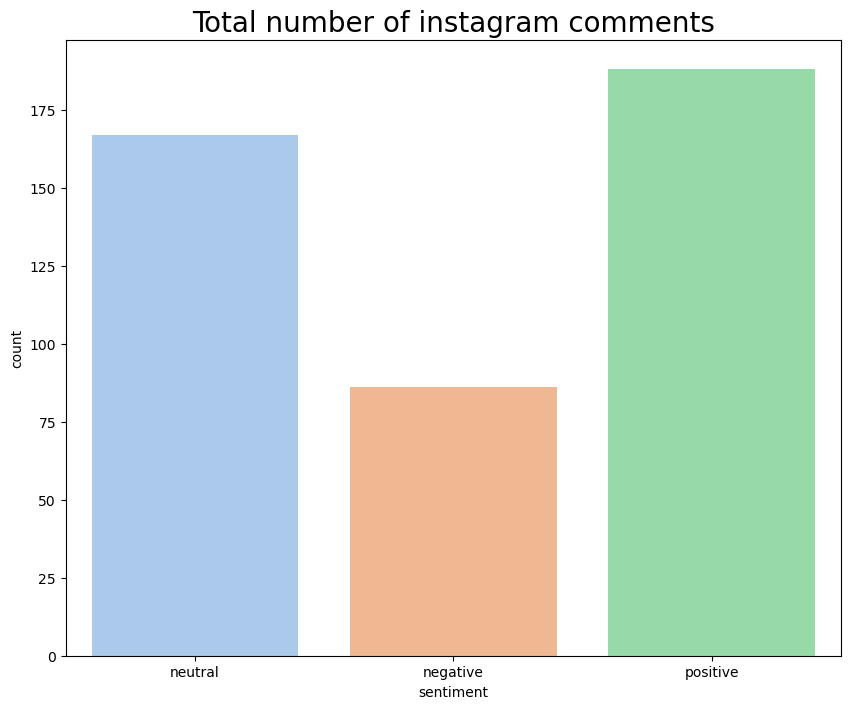

In [12]:
print("Total number of sentiments of instagram comments :",'green')
print(df.sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'sentiment', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of instagram comments', fontsize = 20)
plt.show()

In [13]:
# Split text of Sentiments    
positive = df[df['sentiment'] == 'positive'].text
neutral  = df[df['sentiment'] == 'neutral'].text
negative = df[df['sentiment'] == 'negative'].text

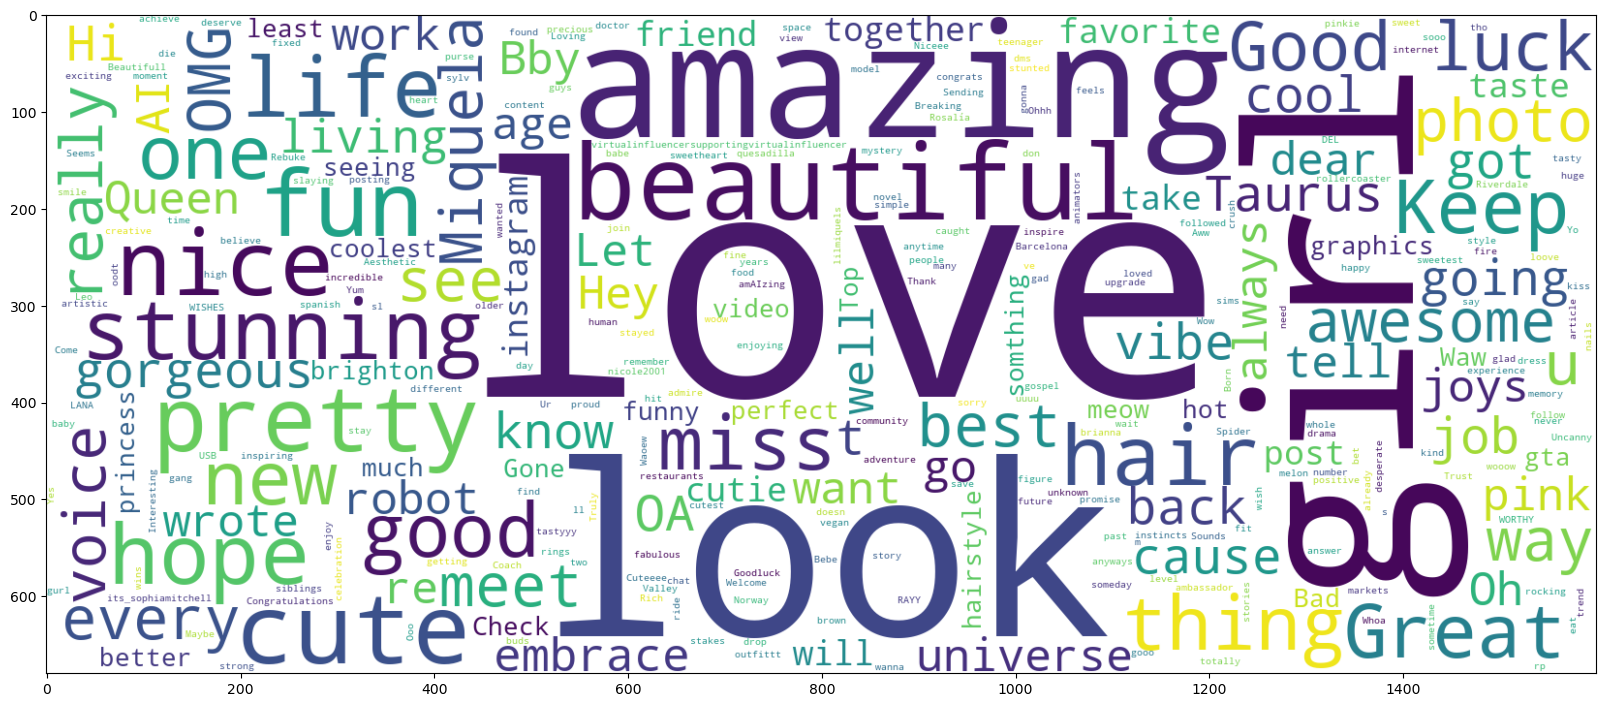

In [14]:
# world could of positive sentiments
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680 , background_color='white').generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

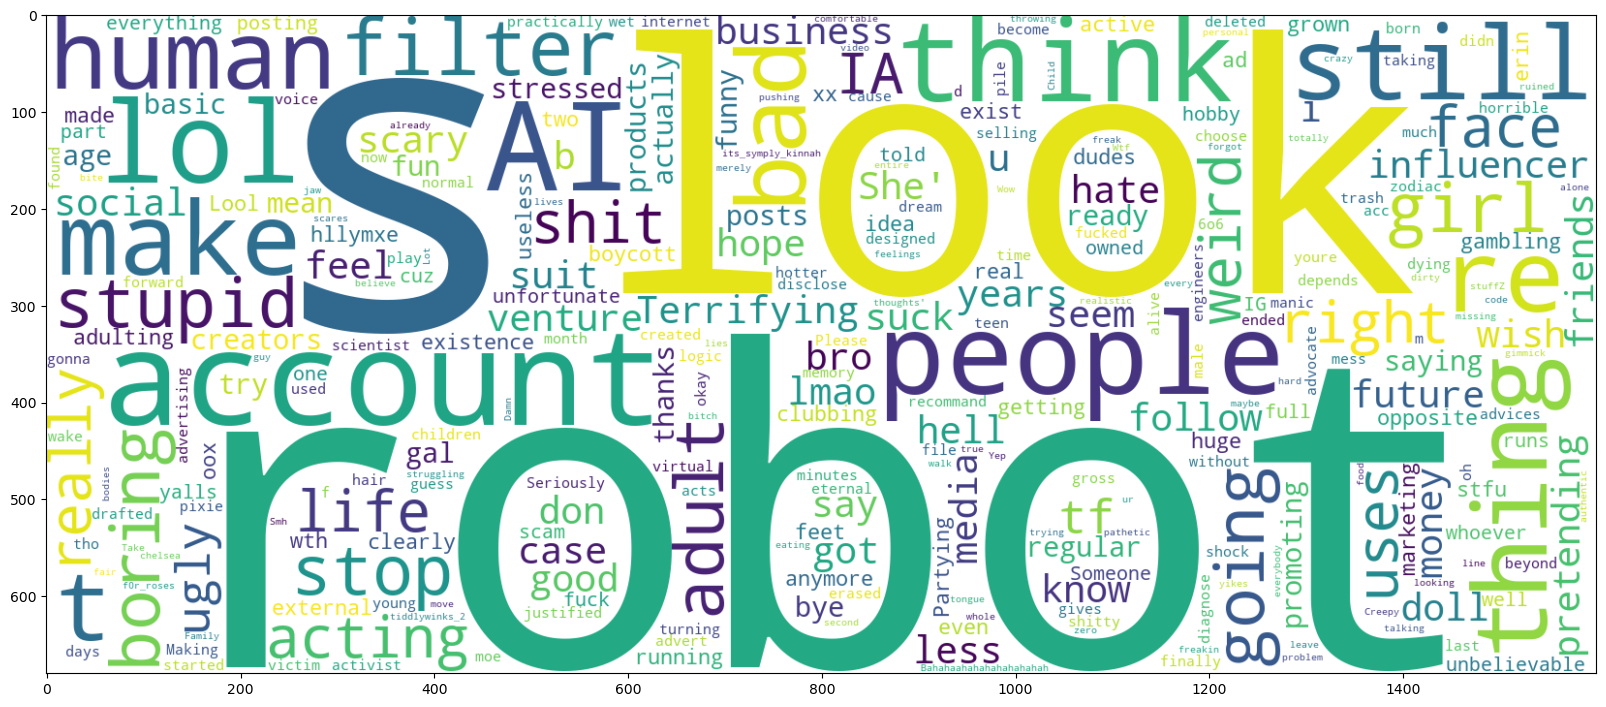

In [15]:
# world could of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680 , background_color='white').generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

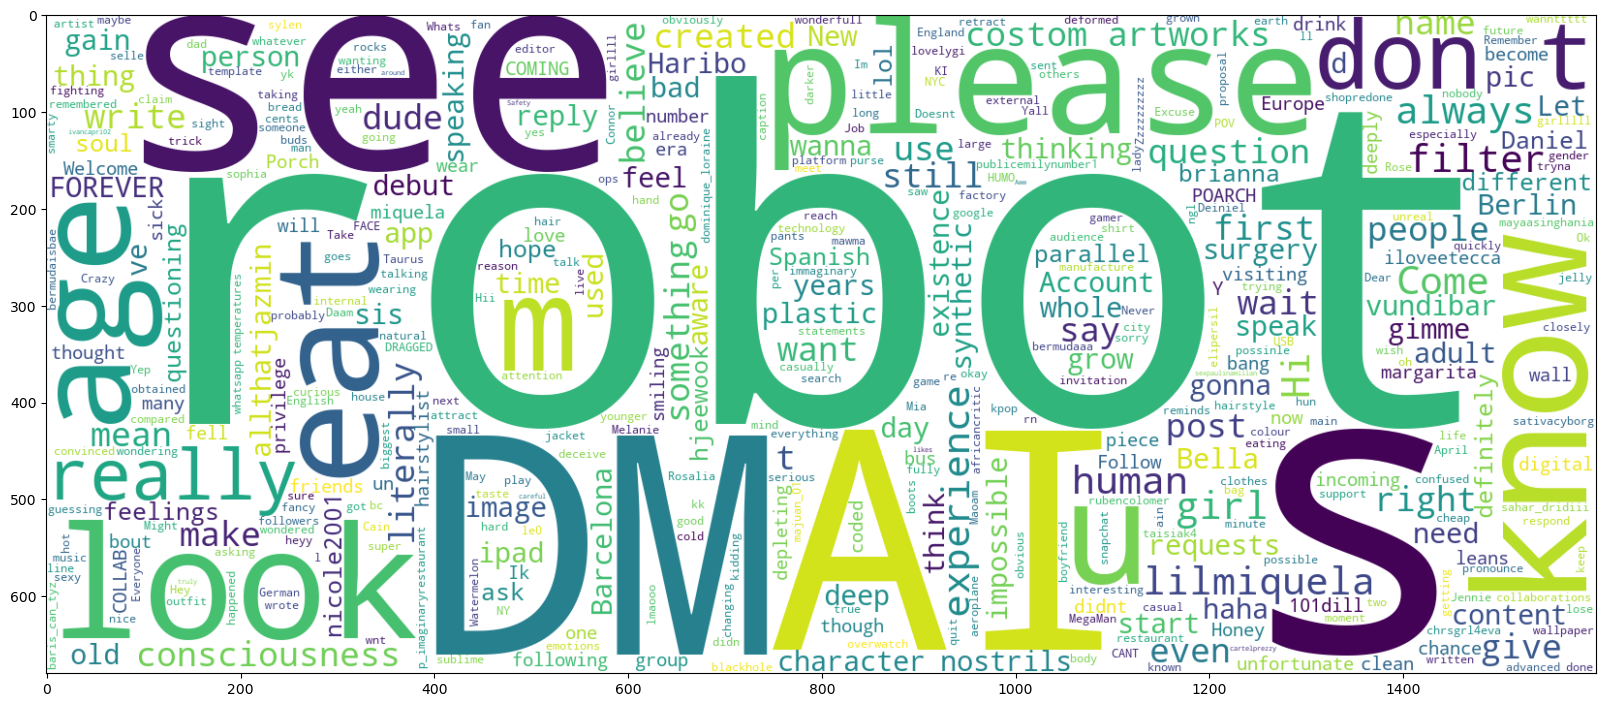

In [16]:
# world could of neutral sentiments
plt.figure(figsize = (20,20)) 
worldcould_neutral = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680 ,background_color='white' ).generate(" ".join(neutral))
plt.imshow(worldcould_neutral,interpolation = 'bilinear')
ax.grid(False)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [18]:
df.sentiment

2      1
3      1
4      1
6      0
7      0
      ..
498    2
499    0
500    2
501    2
502    0
Name: sentiment, Length: 441, dtype: int32

In [19]:
df['sentiment'].value_counts()

sentiment
2    188
1    167
0     86
Name: count, dtype: int64

In [20]:
import contractions

In [21]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
import contractions
# Decontraction text 
def expand_contractions(text):
    expanded_text = []
    for word in text.split():
        expanded_text.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_text)
    return expanded_text
# Removing Non-Alphabetic Characters
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute
#Remove hashtag
def remove_hashtag(text):
    t_hash = re.sub(r'[#][^\s]+', '', text)
    return t_hash
# convert text into lowercase
def lower_case(text):
    t_lc = text.lower()
    return t_lc

In [22]:
import string
# Apply functions on instagram comments 
df['text'] = df['text'].apply(lambda x : remove_url(x))
df['text'] = df['text'].apply(lambda x : remove_punct(x))
df['text'] = df['text'].apply(lambda x : remove_username(x))
df['text'] = df['text'].apply(lambda x : remove_hashtag(x))
df['text'] = df['text'].apply(lambda x : remove_emoji(x))
df['text'] = df['text'].apply(lambda x : expand_contractions(x))
df['text'] = df['text'].apply(lambda x : char(x))
df['text'] = df['text'].apply(lambda x : lower_case(x))
df['text'] = df['text'].apply(lambda x : remove_stopwords(x))

In [23]:
df['text1']=df['text']

In [24]:
from nltk.stem import WordNetLemmatizer

In [25]:
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

In [26]:
df['text']

2                                               app use
3                                                  dill
4                                         really though
6               thanks bye stupid try product promoting
7               creator make age boring make basic post
                             ...                       
498          love congrats new ambassador coach amazing
499                        social medium ia ruined life
500    aww sibling best bet two many fun story together
501                                     cute smile well
502                 gimmick trying hard human authentic
Name: text, Length: 441, dtype: object

In [27]:
X = df['text']
y = df['sentiment']

In [28]:
# Apply TFIDF on cleaned instagram comments
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [29]:
import pickle
pickle.dump(tfid, open('Models/tfidf_vectorizer.pkl', 'wb'))

In [30]:
from imblearn.over_sampling import SMOTE # Handling Imbalanced

In [31]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [32]:
print(y_sm.value_counts())

sentiment
1    188
0    188
2    188
Name: count, dtype: int64


In [33]:
# Split Data into train & test 
from sklearn.model_selection import train_test_split # Split Data 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)

##  Machine Learning

In [34]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [35]:
svm_prediction =  svm.predict(X_test)

In [36]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [37]:
accuracy_score(svm_prediction,y_test)

0.7787610619469026

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [40]:
nb_prediction =  nb.predict(X_test)

In [41]:
accuracy_score(nb_prediction,y_test)

0.7433628318584071

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
ds_prediction =  ds.predict(X_test)

In [45]:
accuracy_score(ds_prediction,y_test)

0.7256637168141593

In [46]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()
lc.fit(X_train, y_train)

LogisticRegression()

In [47]:
lc_prediction = lc.predict(X_test)

In [48]:
accuracy_score(lc_prediction,y_test)

0.7964601769911505

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [51]:
xgb_prediction =  xgb.predict(X_test)

In [52]:
accuracy_score(xgb_prediction,y_test)

0.7345132743362832

In [53]:
cr = classification_report(y_test, svm_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.94      0.76      0.84        41
           1       0.64      0.85      0.73        40
           2       0.85      0.72      0.78        32

    accuracy                           0.78       113
   macro avg       0.81      0.77      0.78       113
weighted avg       0.81      0.78      0.78       113



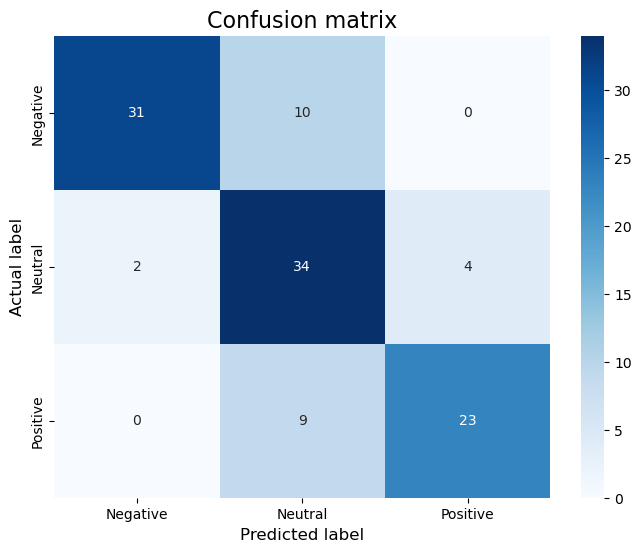

In [54]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,svm_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=12)
plt.ylabel('Actual label', fontsize=12)
plt.show()

In [55]:
#hyperparamètres
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto'],  
}

grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (accuracy): ", grid_search.best_score_)

best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

print("Classification report on the test set:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score (accuracy):  0.7738705738705738
Classification report on the test set:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.76      0.72      0.74        40
           2       0.74      0.91      0.82        32

    accuracy                           0.81       113
   macro avg       0.82      0.82      0.81       113
weighted avg       0.82      0.81      0.81       113



In [57]:
pickle.dump(best_svc, open('Models/best_svc.pkl' , 'wb'))

## Deep Learning

In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [59]:
X = df['text']
y = df['sentiment']

In [60]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

In [61]:
max_length = 100
X_padded = pad_sequences(X_seq, maxlen=max_length, padding='post', truncating='post')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [63]:
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    SimpleRNN(64),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  
])

In [64]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/30


11/11 [==============================] - 2s 35ms/step - loss: 1.0815 - accuracy: 0.3835 - val_loss: 1.0765 - val_accuracy: 0.3708
Epoch 2/30
11/11 [==============================] - 0s 13ms/step - loss: 1.0630 - accuracy: 0.4176 - val_loss: 1.0478 - val_accuracy: 0.4494
Epoch 3/30
11/11 [==============================] - 0s 13ms/step - loss: 1.0677 - accuracy: 0.3920 - val_loss: 1.0396 - val_accuracy: 0.4494
Epoch 4/30
11/11 [==============================] - 0s 12ms/step - loss: 1.0696 - accuracy: 0.3608 - val_loss: 1.0425 - val_accuracy: 0.4494
Epoch 5/30
11/11 [==============================] - 0s 13ms/step - loss: 1.0581 - accuracy: 0.4403 - val_loss: 1.0405 - val_accuracy: 0.4494
Epoch 6/30
11/11 [==============================] - 0s 12ms/step - loss: 1.0374 - accuracy: 0.4688 - val_loss: 1.0443 - val_accuracy: 0.5056
Epoch 7/30
11/11 [==============================] - 0s 12ms/step - loss: 0.9111 - accuracy: 0.5767 - val_loss: 1.1337 - val_accuracy: 0.4831
Epoch 8/30


In [66]:
rnn_eval = rnn_model.evaluate(X_test, y_test)
print(f"Simple RNN Test Loss: {rnn_eval[0]}, Test Accuracy: {rnn_eval[1]}")

3/3 [==============================] - 0s 3ms/step - loss: 1.1641 - accuracy: 0.5169
Simple RNN Test Loss: 1.1640805006027222, Test Accuracy: 0.516853928565979


In [67]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 649347 (2.48 MB)
Trainable params: 649347 (2.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

In [69]:
X = df['text']
y = df['sentiment']

In [70]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

In [71]:
max_length = 100
X_padded = pad_sequences(X_seq, maxlen=max_length, padding='post', truncating='post')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [74]:
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  
])

In [75]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/30
11/11 [==============================] - 3s 88ms/step - loss: 1.0872 - accuracy: 0.3864 - val_loss: 1.0616 - val_accuracy: 0.4494
Epoch 2/30
11/11 [==============================] - 0s 24ms/step - loss: 1.0526 - accuracy: 0.4205 - val_loss: 1.0264 - val_accuracy: 0.4494
Epoch 3/30
11/11 [==============================] - 0s 24ms/step - loss: 1.0356 - accuracy: 0.4347 - val_loss: 1.0126 - val_accuracy: 0.4719
Epoch 4/30
11/11 [==============================] - 0s 25ms/step - loss: 1.0128 - accuracy: 0.5426 - val_loss: 0.9924 - val_accuracy: 0.4607
Epoch 5/30
11/11 [==============================] - 0s 24ms/step - loss: 0.9702 - accuracy: 0.5312 - val_loss: 0.9577 - val_accuracy: 0.5955
Epoch 6/30
11/11 [==============================] - 0s 24ms/step - loss: 0.9023 - accuracy: 0.6307 - val_loss: 0.9016 - val_accuracy: 0.5955
Epoch 7/30
11/11 [==============================] - 0s 24ms/step - loss: 0.8049 - accuracy: 0.7131 - val_loss: 0.8660 - val_accuracy: 0.6067
Epoch 8/30
11

In [77]:
lstm_eval = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Test Loss: {lstm_eval[0]}, Test Accuracy: {lstm_eval[1]}")

3/3 [==============================] - 0s 9ms/step - loss: 1.0275 - accuracy: 0.6966
LSTM Test Loss: 1.0274845361709595, Test Accuracy: 0.6966292262077332


In [78]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 708163 (2.70 MB)
Trainable params: 708163 (2.70 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [79]:
from keras_tuner import RandomSearch
X = df['text']
y = df['sentiment']


tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
max_length = max(len(x) for x in X_sequences)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=10000, 
                        output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32), 
                        input_length=max_length))
    model.add(Bidirectional(LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32))))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(3, activation='softmax'))  
    
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  
    executions_per_trial=3,
    directory='my_dir',
    project_name='bidirectional_lstm_hyperparam_tuning'
)


tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model Test Loss: {loss}, Test Accuracy: {accuracy}")

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Embedding Dimension: {best_hyperparameters.get('embedding_dim')}")
print(f"LSTM Units: {best_hyperparameters.get('lstm_units')}")
print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")

Reloading Tuner from my_dir\bidirectional_lstm_hyperparam_tuning\tuner0.json
3/3 [==============================] - 1s 7ms/step - loss: 0.7725 - accuracy: 0.6966
Best model Test Loss: 0.7724953293800354, Test Accuracy: 0.6966292262077332
Best Hyperparameters:
Embedding Dimension: 128
LSTM Units: 128
Dropout Rate: 0.5


##  Pretrained Model 

In [80]:
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from tqdm import tqdm

C:\Users\USER\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [81]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [82]:
# the dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }


In [83]:
# Data preparation
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_dataset = SentimentDataset(train_df['text1'].values, train_df['sentiment'].values, tokenizer)
val_dataset = SentimentDataset(val_df['text1'].values, val_df['sentiment'].values, tokenizer)
test_dataset = SentimentDataset(test_df['text1'].values, test_df['sentiment'].values, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [84]:
# Model setup
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
num_epochs = 3
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
criterion = torch.nn.CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
# Training function
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for batch in tqdm(train_loader):
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['label']

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            scheduler.step()

            running_loss += loss.item() * input_ids.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

In [86]:
# Evaluation function
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    total_loss = 0.0
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            labels = batch['label']

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item() * input_ids.size(0)
            _, preds = torch.max(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return avg_loss, accuracy, precision, recall, f1

100%|██████████| 11/11 [01:33<00:00,  8.50s/it]


Epoch 1/3, Loss: 1.1016


100%|██████████| 11/11 [01:40<00:00,  9.10s/it]


Epoch 2/3, Loss: 0.9518


100%|██████████| 11/11 [01:35<00:00,  8.73s/it]


Epoch 3/3, Loss: 0.8722


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


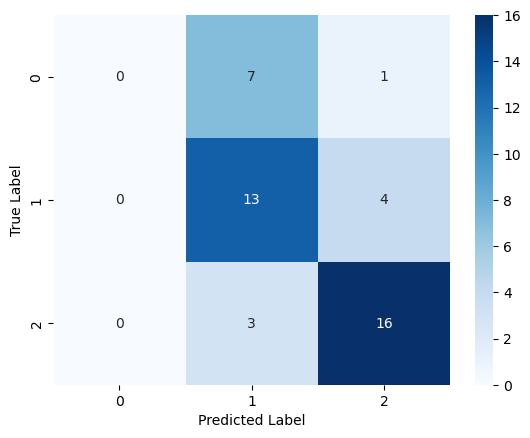

Validation Loss: 0.8261, Accuracy: 0.6591, Precision: 0.5474, Recall: 0.6591, F1 Score: 0.5966


In [87]:
# Training and evaluation
num_epochs = 3
train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs)
val_loss, val_accuracy, val_precision, val_recall, val_f1 = evaluate_model(model, val_loader)

print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")